<a href="https://colab.research.google.com/github/amamory/google-colab-repos/blob/master/MNIST_onnx_runtime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing ONNX Runtime with MNIST Dataset

This is an adaptation of this [example](https://github.com/Cuda-Chen/keras2onnx-example/blob/master/comparison.py) to test the MNIST digits with ONNX-runtime

In [1]:
!pip install --quiet -U onnxruntime

     |████████████████████████████████| 3.9MB 2.8MB/s 
     |████████████████████████████████| 7.4MB 23.7MB/s 


In [0]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.preprocessing import image
import sys
import numpy as np
import matplotlib.pyplot as plt
import onnxruntime
import time

In [3]:
  from google.colab import drive
  drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# load Keras and ONNX model
# these model files are also available at the models dir
net = load_model('/content/drive/My Drive/Colab Notebooks/models/mnist-model.h5')
onnx_model = '/content/drive/My Drive/Colab Notebooks/models/mnist-model.onnx'
sess = onnxruntime.InferenceSession(onnx_model)

(28, 28)
(1, 28, 28, 1)
<class 'numpy.ndarray'>


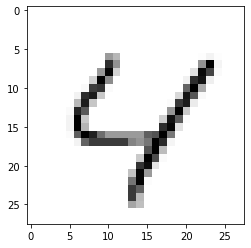

In [25]:
# image preprocessing
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

IMAGE_SIZE = 28 
loop_count = 10
# these samples of MNIST images are also available at the images dir
img_path = '/content/drive/My Drive/Colab Notebooks/images/4.bmp'

img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
img = image.img_to_array(img)
gray = rgb2gray(img)
print (gray.shape)

x = image.img_to_array(gray)
x = np.expand_dims(x, axis=0)
print (x.shape)

plt.imshow(gray, cmap='Greys')
plt.show()

In [26]:
# Keras predtion
start_time = time.time()
for i in range(loop_count):
    pred = net.predict(x)[0]
print (pred)
print("Keras inferences with %s second in average" %((time.time() - start_time) / loop_count))

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Keras inferences with 0.034112977981567386 second in average


In [32]:
# ONNX prediction
x_onnx = x if isinstance(x, list) else [x]
# onnx data needs to be a list, not a numpy array
feed = dict([(input.name, x_onnx[n]) for n, input in enumerate(sess.get_inputs())])

start_time = time.time()
for i in range(loop_count):
    pred_onnx = sess.run(None, feed)[0]
print (pred_onnx)
print("ONNX inferences with %s second in average" %((time.time() - start_time) / loop_count))

if pred.all() == pred_onnx.all():
  print ('Both keras and ONNX predictions are matching')
else:
  print ('ERROR: keras and ONNX predictions are NOT matching')

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
ONNX inferences with 0.00011355876922607422 second in average
Both keras and ONNX predictions are matching
